In [ ]:
%load_ext pycodestyle_magic
%flake8_on

### Plot Male and Female photos

In [ ]:
import random
random.seed(1)

In [ ]:
# plot iris data
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
folder = '../data/raw/iris_data/LG2200/gender/'
onlyfiles = [f for f in listdir(folder+'Female')
             if isfile(join(folder+'Female', f))]

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder+'Female/'+onlyfiles[i]
    # load image pixels
    image = imread(filename, 'tiff')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# plot iris data
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '../data/raw/iris_data/LG2200/gender/'
onlyfiles = [f for f in listdir(folder+'Male')
             if isfile(join(folder+'Male', f))]

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder+'Male/'+onlyfiles[i]
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)

# show the figure
fig1 = pyplot.gcf()
pyplot.show()
pyplot.draw()
pyplot.savefig('../data/iris_results.png')

### Preprocess photos

In [ ]:
# load iris dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = '../data/raw/train/'

photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('cat'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('iris_Male.npy', photos)
save('iris_female.npy', labels)

In [ ]:
# load and confirm the shape
from numpy import load
photos = load('iris_Male.npy')
labels = load('iris_female.npy')
print(photos.shape, labels.shape)

### Pre-Process Photos into Standard Directories

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import random

# create directories
dataset_home = '../data/processed/iris_data/LG2200/gender/'

subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['Male/', 'Female/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories

root_directory = '../data/raw/iris_data/LG2200/gender/'
subdirs = ['Male/', 'Female/']
for subdir in subdirs:
    src_directory = root_directory + subdir

    # Let's get the captured irises.
    list_files = listdir(src_directory)
    # There are some irises that doesn't have identification. So we have to filter them first.
    list_files_ok = [sub for sub in list_files if 'd' in sub]
    list_users_with_id = [sub.split('d')[1].split('.')[0] for sub in list_files_ok]

    # We identify the users by deleting repeated users
    list_unique_users = list(set(list_users_with_id))
    print("Lista de individuos sin repetir imágenes de iris: ", len(list_unique_users))

    # Split train - test
    random.shuffle(list_unique_users)
    len_test = round(val_ratio*len(list_unique_users))
    len_train = len(list_unique_users) - len_test
    train_users = list_unique_users[0:len_train]
    test_users = list_unique_users[len_train:]

    train_set = []
    for i in train_users:
        for str_element in list_files_ok:
            if i == str_element.split('d')[1].split('.')[0]:
                train_set.append(str_element)

    test_set = []
    for j in test_users:
        for str_element in list_files_ok:
            if j == str_element.split('d')[1].split('.')[0]:
                test_set.append(str_element)
                
    # Let's copy the different datasets  
    dst_dir = 'train/'
    for file in train_set:
        src = src_directory + '/' + file
        dst = dataset_home + dst_dir + subdir  + file    
        copyfile(src, dst)

    dst_dir = 'test/'
    for file in test_set:
        src = src_directory + '/' + file
        dst = dataset_home + dst_dir + subdir  + file    
        copyfile(src, dst)

In [ ]:
# Small routine to check data leakage 
var = '42'

lista = []
for str_element in train_set:
    lista.append(var == str_element.split('d')[1].split('.')[0])

print('train set')
for i in range(len(np.where(lista)[0])):
    print(train_set[np.where(lista)[0][i]])
    
lista = []
for str_element in test_set:
    lista.append(var == str_element.split('d')[1].split('.')[0])

print('test set')
for i in range(len(np.where(lista)[0])):
    print(test_set[np.where(lista)[0][i]])

#### Create datasets for cross-validation

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import random
from sklearn.model_selection import KFold

# create directories
dataset_home = '../data/processed/iris_data/LG2200/gender/train/'
dataset_destination = '../data/processed/iris_data/LG2200/'
cv_subdirs = ['cv1/', 'cv2/', 'cv3/']


subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    for cv_subdir in cv_subdirs:
        labeldirs = ['Male/', 'Female/']
        for labldir in labeldirs:
            newdir = dataset_destination + cv_subdir + subdir + labldir
            makedirs(newdir, exist_ok=True)

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories

root_directory = '../data/processed/iris_data/LG2200/gender/train/'
subdirs = ['Male/', 'Female/']

for subdir in subdirs:
    src_directory = root_directory + subdir

    # Let's get the captured irises.
    list_files = listdir(src_directory)
    # There are some irises that doesn't have identification. So we have to filter them first.
    list_files_ok = [sub for sub in list_files if 'd' in sub]
    list_users_with_id = [sub.split('d')[1].split('.')[0] for sub in list_files_ok]

    # We identify the users by deleting repeated users
    list_unique_users = list(set(list_users_with_id))
    print("Lista de individuos sin repetir imágenes de iris: ", len(list_unique_users))
    
    # Let's split the data to perform CV3
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    kf.get_n_splits(list_unique_users)
    
    # Let's start cv folder count
    cv_index = 1
    
    for train_index, test_index in kf.split(list_unique_users):
        X_train, X_test = [list_unique_users[i] for i in train_index], [list_unique_users[i] for i in test_index]

        train_users = X_train
        test_users = X_test

        train_set = []
        for i in train_users:
            for str_element in list_files_ok:
                if i == str_element.split('d')[1].split('.')[0]:
                    train_set.append(str_element)

        test_set = []
        for j in test_users:
            for str_element in list_files_ok:
                if j == str_element.split('d')[1].split('.')[0]:
                    test_set.append(str_element)

        cv_subdir = 'cv'+ str(cv_index) + '/'
        # Let's copy the different datasets  
        dst_dir = 'train/'
        for file in train_set:
            src = src_directory + '/' + file
            dst = dataset_destination + cv_subdir + dst_dir + subdir  + file    
            copyfile(src, dst)

        dst_dir = 'test/'
        for file in test_set:
            src = src_directory + '/' + file
            dst = dataset_destination + cv_subdir + dst_dir + subdir  + file    
            copyfile(src, dst)
        
        # Increase cv folder count
        cv_index = cv_index+1

### Develop a Baseline CNN Model

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 111s 2s/step - loss: 0.5184 - accuracy: 0.7383 - val_loss: 0.9702 - val_accuracy: 0.4593
Epoch 2/100
56/56 [==============================] - 20s 350ms/step - loss: 0.3380 - accuracy: 0.8520 - val_loss: 1.6932 - val_accuracy: 0.4593
Epoch 3/100
56/56 [==============================] - 25s 443ms/step - loss: 0.2561 - accuracy: 0.9124 - val_loss: 2.4995 - val_accuracy: 0.4593
Epoch 4/100
56/56 [==============================] - 22s 389ms/step - loss: 0.1955 - accuracy: 0.9503 - val_loss: 1.4055 - val_accuracy: 0.4632
Epoch 5/100
56/56 [==============================] - 24s 427ms/step - loss: 0.1510 - accuracy: 0.9736 - val_loss: 1.0535 - val_accuracy: 0.4922
Epoch 6/100
56/56 [==============================] - 23s 413ms/step - loss: 0.1263 - accuracy: 0.9851 - val_loss: 1.1459 - val_accuracy: 0.6076
Epoch 7/100
56/56 [==============================] - 

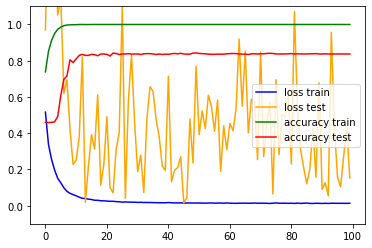

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


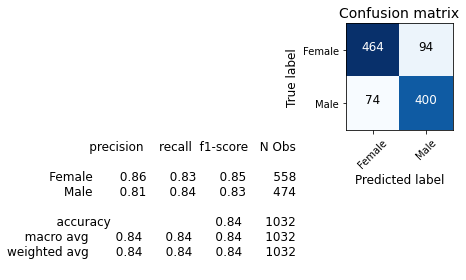

In [1]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# # define cnn model
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu',
#               kernel_initializer='he_uniform',
#               padding='same',
#               input_shape=(240, 320, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu',
#               kernel_initializer='he_uniform'))
#     model.add(Dense(1, activation='sigmoid'))
#     # compile model
#     opt = SGD(lr=0.0, momentum=0.1)
# #     opt = SGD(lr=0.001, momentum=0.9)
#     model.compile(optimizer=opt,
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3),
              kernel_initializer='he_uniform',
              padding='same',
              input_shape=(240, 320, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128,
              kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
#     opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
                                           class_mode='binary',
                                           batch_size=64,
                                           target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                                  validation_data=test_it,
                                  validation_steps=len(test_it),
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it),
                                      verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)


# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### One Block VGG Model

Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.
Epoch 1/100
56/56 [==============================] - 24s 430ms/step - loss: 5.8927 - accuracy: 0.5327 - val_loss: 0.6902 - val_accuracy: 0.5407
Epoch 2/100
56/56 [==============================] - 20s 353ms/step - loss: 0.6269 - accuracy: 0.6625 - val_loss: 0.7610 - val_accuracy: 0.6909
Epoch 3/100
56/56 [==============================] - 23s 405ms/step - loss: 0.5976 - accuracy: 0.7079 - val_loss: 0.5555 - val_accuracy: 0.6986
Epoch 4/100
56/56 [==============================] - 24s 434ms/step - loss: 0.5974 - accuracy: 0.7023 - val_loss: 0.5636 - val_accuracy: 0.7374
Epoch 5/100
56/56 [==============================] - 24s 426ms/step - loss: 0.5705 - accuracy: 0.7388 - val_loss: 0.5085 - val_accuracy: 0.7364
Epoch 6/100
56/56 [==============================] - 27s 481ms/step - loss: 0.5605 - accuracy: 0.7273 - val_loss: 0.4527 - val_accuracy: 0.7471
Epoch 7/100
56/56 [==============================] -

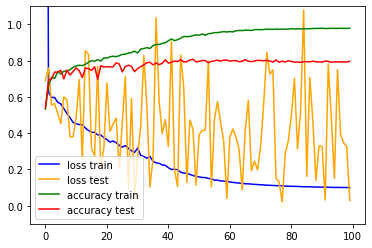

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


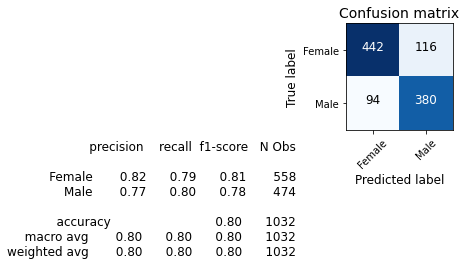

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

# # define cnn model
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(1, activation='sigmoid'))
# 	# compile model
# 	opt = SGD(lr=0.001, momentum=0.9)
# 	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# 	return model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()



def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate
    
# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    
    # fit model
    history = model.fit_generator(train_it, 
                                  steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)
    
# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()


### Two Block VGG Model 

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 133s 2s/step - loss: 0.5209 - accuracy: 0.7520 - val_loss: 0.4187 - val_accuracy: 0.6705
Epoch 2/100
56/56 [==============================] - 21s 371ms/step - loss: 0.3257 - accuracy: 0.8587 - val_loss: 1.4663 - val_accuracy: 0.4661
Epoch 3/100
56/56 [==============================] - 22s 399ms/step - loss: 0.2279 - accuracy: 0.9183 - val_loss: 1.3188 - val_accuracy: 0.4612
Epoch 4/100
56/56 [==============================] - 22s 401ms/step - loss: 0.1309 - accuracy: 0.9719 - val_loss: 0.8547 - val_accuracy: 0.4680
Epoch 5/100
56/56 [==============================] - 22s 394ms/step - loss: 0.0768 - accuracy: 0.9899 - val_loss: 0.4758 - val_accuracy: 0.4748
Epoch 6/100
56/56 [==============================] - 21s 383ms/step - loss: 0.0421 - accuracy: 0.9986 - val_loss: 0.5074 - val_accuracy: 0.5359
Epoch 7/100
56/56 [==============================] - 

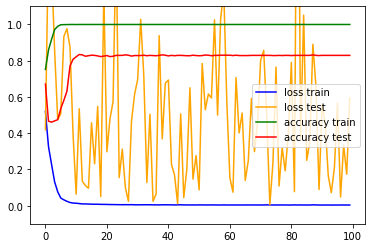

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


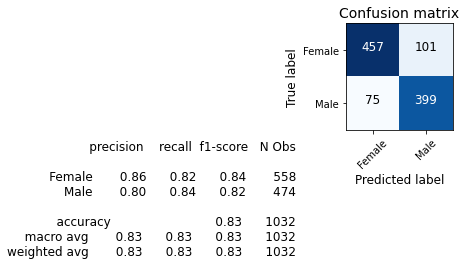

In [1]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(1, activation='sigmoid'))
# 	# compile model
# 	opt = SGD(lr=0.001, momentum=0.9)
# 	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# 	return model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))  
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))  
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate
    
# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]    
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)

    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### Three Block VGG Model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 28s 496ms/step - loss: 0.5243 - accuracy: 0.7397 - val_loss: 0.5837 - val_accuracy: 0.6793
Epoch 2/100
56/56 [==============================] - 26s 467ms/step - loss: 0.3052 - accuracy: 0.8787 - val_loss: 0.9491 - val_accuracy: 0.4603
Epoch 3/100
56/56 [==============================] - 27s 489ms/step - loss: 0.2095 - accuracy: 0.9351 - val_loss: 1.5293 - val_accuracy: 0.4632
Epoch 4/100
56/56 [==============================] - 25s 446ms/step - loss: 0.1372 - accuracy: 0.9725 - val_loss: 1.4314 - val_accuracy: 0.4806
Epoch 5/100
56/56 [==============================] - 26s 458ms/step - loss: 0.0898 - accuracy: 0.9919 - val_loss: 1.0386 - val_accuracy: 0.5320
Epoch 6/100
56/56 [==============================] - 27s 487ms/step - loss: 0.0592 - accuracy: 0.9975 - val_loss: 0.2793 - val_accuracy: 0.5998
Epoch 7/100
56/56 [==============================] 

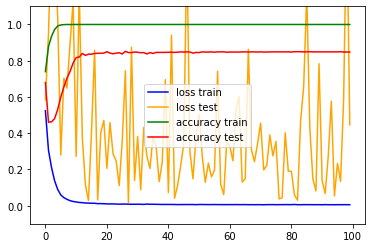

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


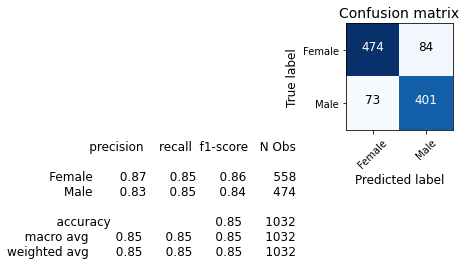

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
# def define_model():
# 	model = Sequential()
# 	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# 	model.add(MaxPooling2D((2, 2)))
# 	model.add(Flatten())
# 	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# 	model.add(Dense(1, activation='sigmoid'))
# 	# compile model
# 	opt = SGD(lr=0.001, momentum=0.9)
# 	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
# 	return model

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))     
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))     
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation("relu")) 
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                      epochs=100, verbose=1, 
                                  callbacks=callbacks_list)

    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### Develop Model Improvements

#### Dropout Regularization

Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.
Epoch 1/100
56/56 [==============================] - 28s 492ms/step - loss: 0.6088 - accuracy: 0.6933 - val_loss: 0.7898 - val_accuracy: 0.4612
Epoch 2/100
56/56 [==============================] - 26s 457ms/step - loss: 0.4952 - accuracy: 0.7579 - val_loss: 1.0442 - val_accuracy: 0.4593
Epoch 3/100
56/56 [==============================] - 26s 462ms/step - loss: 0.4541 - accuracy: 0.7756 - val_loss: 2.5602 - val_accuracy: 0.4593
Epoch 4/100
56/56 [==============================] - 27s 479ms/step - loss: 0.4317 - accuracy: 0.7863 - val_loss: 1.2602 - val_accuracy: 0.4593
Epoch 5/100
56/56 [==============================] - 28s 492ms/step - loss: 0.4117 - accuracy: 0.8060 - val_loss: 2.4789 - val_accuracy: 0.4593
Epoch 6/100
56/56 [==============================] - 27s 485ms/step - loss: 0.3981 - accuracy: 0.8079 - val_loss: 1.7410 - val_accuracy: 0.4593
Epoch 7/100
56/56 [==============================] -

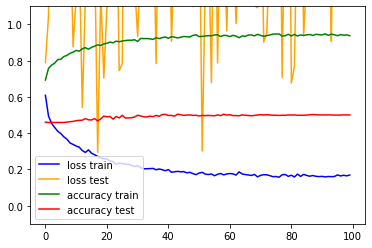

D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


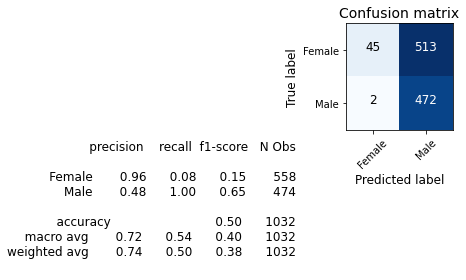

In [3]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))        
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))        
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3),kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))        
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))        
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])

def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)

    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

#### Image Data Augmentation

Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.
Epoch 1/100
56/56 [==============================] - 84s 2s/step - loss: 2.0154 - accuracy: 0.5835 - val_loss: 0.8658 - val_accuracy: 0.5436
Epoch 2/100
56/56 [==============================] - 86s 2s/step - loss: 0.5845 - accuracy: 0.6807 - val_loss: 0.6251 - val_accuracy: 0.6638
Epoch 3/100
56/56 [==============================] - 85s 2s/step - loss: 0.5443 - accuracy: 0.7169 - val_loss: 0.5389 - val_accuracy: 0.6686
Epoch 4/100
56/56 [==============================] - 78s 1s/step - loss: 0.5271 - accuracy: 0.7220 - val_loss: 0.6343 - val_accuracy: 0.6919
Epoch 5/100
56/56 [==============================] - 76s 1s/step - loss: 0.5195 - accuracy: 0.7209 - val_loss: 0.5011 - val_accuracy: 0.6996
Epoch 6/100
56/56 [==============================] - 82s 1s/step - loss: 0.5155 - accuracy: 0.7341 - val_loss: 0.5793 - val_accuracy: 0.7103
Epoch 7/100
56/56 [==============================] - 77s 1s/step - los

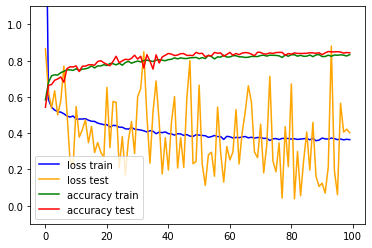

NameError: name 'datagen' is not defined

In [4]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(240, 320, 3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))     
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))     
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))     
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

    
# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'
    # define model
    model = define_model()
    # create data generators
    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory(train_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = test_datagen.flow_from_directory(test_path,
        class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, test_datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

### Explore Transfer Learning

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\vhcg77\Anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 3561 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.

Epoch 1/100
56/56 [==============================] - 35s 623ms/step - loss: 16.9889 - accuracy: 0.5279 - val_loss: 0.6425 - val_accuracy: 0.6754
Epoch 2/100
56/56 [==============================] - 29s 513ms/step - loss: 0.6853 - accuracy: 0.5274 - val_loss: 0.6932 - val_accuracy: 0.4671
Epoch 3/100
56/56 [==============================] - 32s 570ms/step - loss: 0.6898 - accuracy: 0.5274 - val_loss: 0.6945 - val_accuracy: 0.4719
Epoch 4/100
56/56 [==============================] - 30s 529ms/step - loss: 0.6920 - accuracy: 0.5215 - val_loss: 0.6646 - val_accuracy: 0.4583
Epoch 5/100
56/56 [==============================] - 29s 512ms/step - loss: 0.6815 - accuracy: 0.5086 - val_loss: 0.6932 - val_accuracy: 0.4583
Epoch 6/100
56/56 [==============================] - 29s 517ms/step - loss: 0.6928 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.4603
Epoch 7/100
56/56 [==============================]

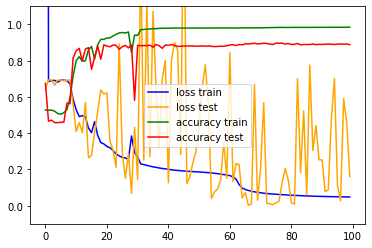

Found 1032 images belonging to 2 classes.
Found 1032 images belonging to 2 classes.


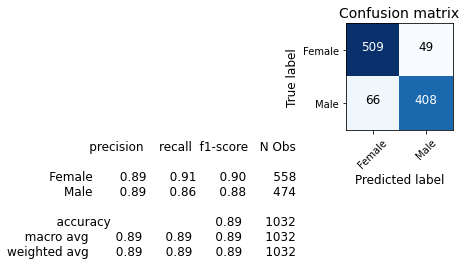

In [1]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report


# define cnn model
def define_model():
	# load model
    model = VGG16(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness():
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=100, verbose=1, 
                                  callbacks=callbacks_list)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    print_metrics(model, datagen, test_path)

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/gender/'
run_test_harness()

#### Explore Transfer Learning: CV

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from statistics import mean 

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(240, 320, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate


# run the test harness for evaluating a model
def run_test_harness(dataset_home):
    train_path = dataset_home + 'train/'
    test_path = dataset_home + 'test/'

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(240, 320))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it,
                                  validation_steps=len(test_it), 
                                  epochs=30, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    
#     print(train_it.class_indices)
#     print(model.summary())
    return acc * 100.0
    # learning curves
#     summarize_diagnostics(history)


acc = []
# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/cv1/'
# print(run_test_harness())
acc.append(run_test_harness(dataset_home))

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/cv2/'
acc.append(run_test_harness(dataset_home))

# entry point, run the test harness
dataset_home = '../data/processed/iris_data/LG2200/cv3/'
acc.append(run_test_harness(dataset_home))

mean(acc)

In [ ]:
mean(acc)

### Explore Transfer Learning: Train: LG2200, Test: LG4000

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

    
# run the test harness for evaluating a model
def run_test_harness(dataset_train, dataset_test):
    train_path = dataset_train
    test_path = dataset_test

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), 
                                  validation_data=test_it, 
                                  validation_steps=len(test_it), 
                                  epochs=30, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_train = '../data/raw/iris_data/LG2200/gender/'
dataset_test = '../data/raw/iris_data/LG4000/gender/'

run_test_harness(dataset_train, dataset_test)

### Explore Transfer Learning: Train: LG4000, Test: LG2200 

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=1.0, momentum=0.1)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    plt.plot(history.history['loss'],
                color='blue', label='loss train')
    plt.plot(history.history['val_loss'],
                color='orange', label='loss test')
    plt.plot(history.history['accuracy'],
                color='green', label='accuracy train')
    plt.plot(history.history['val_accuracy'],
                color='red', label='accuracy test')
    plt.ylim(bottom = -0.1, top = 1.1)
    plt.legend()
    plt.show()


def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='right')    

    # Plot
    plt.tight_layout()


def print_metrics(model, datagen, test_path):
    
    test_it = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=64,
                                          target_size=(240, 320))
    
    test_generator = datagen.flow_from_directory(test_path,
                                          class_mode='binary',
                                          batch_size=1,
                                          target_size=(240, 320))    
    # predict probabilities for test set
    filenames = test_generator.filenames
    nb_samples = len(filenames)
    true_values = []
    predictions = []
    for i in range(nb_samples):
        x_batch, y_batch = test_generator.next()
        name = model.predict(x_batch)
        name =  (name>0.5).astype(int)[0][0]
        true_name = y_batch[0].astype(np.int)
        label_map = (test_generator.class_indices)
        label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
        prediction = label_map[name]
        true_value = label_map[true_name]
        true_values.append(true_value)
        predictions.append(prediction) 
    plt.figure()
    pretty_print_conf_matrix(true_values, predictions, 
                             classes= ['Female', 'Male'])
def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.05
    lrate = initial_lrate * exp(-k*epoch)
    return lrate

# run the test harness for evaluating a model
def run_test_harness(dataset_train, dataset_test):
    train_path = dataset_train
    test_path = dataset_test

    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(train_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory(test_path,
    class_mode='binary', batch_size=64, target_size=(224, 224))
    # learning schedule callback
    lrate = LearningRateScheduler(exp_decay)
    callbacks_list = [lrate, ModelCheckpoint(filepath='model.h5', save_best_only=True)]
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print(train_it.class_indices)
    print(model.summary())
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
dataset_train = '../data/raw/iris_data/LG4000/gender/'
dataset_test = '../data/raw/iris_data/LG2200/gender/'

run_test_harness(dataset_train, dataset_test)

### How to Finalize the Model and Make Predictions

#### Prepare Final Dataset

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
# dataset_home = 'finalize_dogs_vs_cats/'
# create label subdirectories
labeldirs = ['dogs/', 'cats/']

dataset_home = '../data/processed/'
newdir = dataset_home + 'full_train_data'
makedirs(newdir, exist_ok=True)
dataset_home = newdir

for labldir in labeldirs:
	newdir = dataset_home + '/'+ labldir
	makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = '../data/raw/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('cat'):
		dst = dataset_home  + '/'+  'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + '/'+ 'dogs/'  + file
		copyfile(src, dst)

#### Save Final Model

In [ ]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
    train_path = dataset_home
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(dataset_home,
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

#### Make Prediction

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
    # load the image
    dataset_home = '../data/processed/'
    img = load_image(dataset_home+'sample_image.jpg')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()

Pasos siguientes:
1. Extraer la matriz de confusión
2. Aumentar el número de épocas.
3. Descongelar progresivamente las capas.
5. Probar Mobile net: https://arxiv.org/pdf/1810.00736.pdf